In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

# Data Reading & Cleaning

In [51]:
# read dataset
df = pd.read_csv('game_sales.csv')
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [52]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [53]:

# check missing values
print("Count of Missing Value Data")
df.isna().sum()

Count of Missing Value Data


Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

In [55]:
# cleaning dataset
df_cleaned = df.copy()
# df_cleaned.fillna('N/A', inplace=True)
df_cleaned['Release'] = pd.to_datetime(df_cleaned['Release'])

print(df_cleaned.dtypes)
df_cleaned.head()

Name                 object
Sales               float64
Series               object
Release      datetime64[ns]
Genre                object
Developer            object
Publisher            object
dtype: object


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [56]:
# check duplicates
for col_name in df_cleaned.columns:
    print(col_name, df_cleaned[col_name].duplicated().sum())

Name 2
Sales 147
Series 85
Release 47
Genre 116
Developer 68
Publisher 81


In [57]:
# re-check duplicated rows on Name column
duplicated_rows = df_cleaned[df_cleaned.duplicated()]
duplicated_rows

,Name,Sales,Series,Release,Genre,Developer,Publisher
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,2013-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
176,StarCraft II: Legacy of the Void,1.0,StarCraft,2015-11-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [58]:
# save cleaned dataset
df_cleaned.to_csv('game_sales_cleaned.csv', index=False)

# EDA

#### 1. Which game is oldest and newest games in that dataset?

In [59]:
df_cleaned.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [60]:
df_sorted = df_cleaned.sort_values(by='Release')
df_sorted

,Name,Sales,Series,Release,Genre,Developer,Publisher
133,Hydlide,1.0,Hydlide,1984-12-01,Action role-playing,Technology and Entertainment Software,Technology and Entertainment Software
34,Where in the World Is Carmen Sandiego?,4.0,Carmen Sandiego,1985-06-01,Educational,Broderbund,Broderbund
88,International Karate,1.5,International Karate,1985-11-01,Fighting,System 3,Epyx
162,Tetris,1.0,Tetris,1988-01-01,Puzzle,Spectrum HoloByte,Spectrum HoloByte
22,Last Ninja 2,5.5,The Last Ninja,1988-08-01,Action-adventure,System 3,Activision
...,...,...,...,...,...,...,...
139,Mordhau,1.0,NaN,2019-04-01,Action,Triternion,Triternion
10,Fall Guys,10.0,NaN,2020-08-01,Battle royale,Mediatonic,Devolver Digital
110,Crusader Kings III,1.0,Crusader Kings,2020-09-01,Grand strategy,Paradox Development Studio,Paradox Interactive
27,Cyberpunk 2077,4.5,NaN,2020-12-01,Action role-playing,CD Projekt Red,CD Projekt


In [61]:
df_firstlast = pd.concat([df_sorted.head(1), df_sorted.tail(1)])
pd.pivot_table(df_firstlast, index='Name', values='Release')

,Release
Name,
Hydlide,1984-12-01
Valheim,2021-02-01


<b>Conclusion</b>: the oldest game is Hydlide and the newest one is Valheim.

#### 2. Which publisher published most of the games?

In [62]:
df_cleaned['Publisher'].value_counts().head(10)

Electronic Arts            19
Blizzard Entertainment     10
Paradox Interactive         7
Activision                  6
GT Interactive              5
Gathering of Developers     4
Microsoft                   4
Capcom                      4
Virgin Interactive          3
CD Projekt                  3
Name: Publisher, dtype: int64

In [63]:
agg_publisher = df_cleaned['Publisher'].value_counts().head(10)
agg_publisher

Electronic Arts            19
Blizzard Entertainment     10
Paradox Interactive         7
Activision                  6
GT Interactive              5
Gathering of Developers     4
Microsoft                   4
Capcom                      4
Virgin Interactive          3
CD Projekt                  3
Name: Publisher, dtype: int64

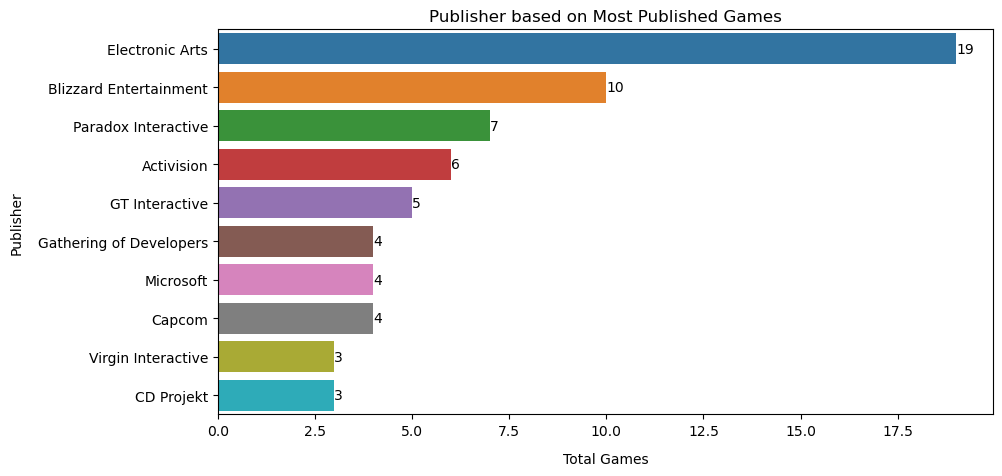

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(y=agg_publisher.index, x=agg_publisher.values)
plt.bar_label(plt.gca().containers[0])
plt.title('Publisher based on Most Published Games')
plt.ylabel('Publisher', labelpad=10)
plt.xlabel('Total Games', labelpad=10)
plt.show()

<b>Conclusion</b>: the publisher with most published games is Electronic Arts.

#### 3. Which developer developed most of the games?

In [65]:
df_cleaned['Developer'].value_counts().head(10)

Blizzard Entertainment        10
Maxis                          6
Paradox Development Studio     5
id Software                    4
Westwood Studios               4
Capcom                         4
Ensemble Studios               4
CD Projekt Red                 4
Valve                          4
Illusion Softworks             3
Name: Developer, dtype: int64

In [66]:
agg_developer = df_cleaned['Developer'].value_counts().head(10)
agg_developer

Blizzard Entertainment        10
Maxis                          6
Paradox Development Studio     5
id Software                    4
Westwood Studios               4
Capcom                         4
Ensemble Studios               4
CD Projekt Red                 4
Valve                          4
Illusion Softworks             3
Name: Developer, dtype: int64

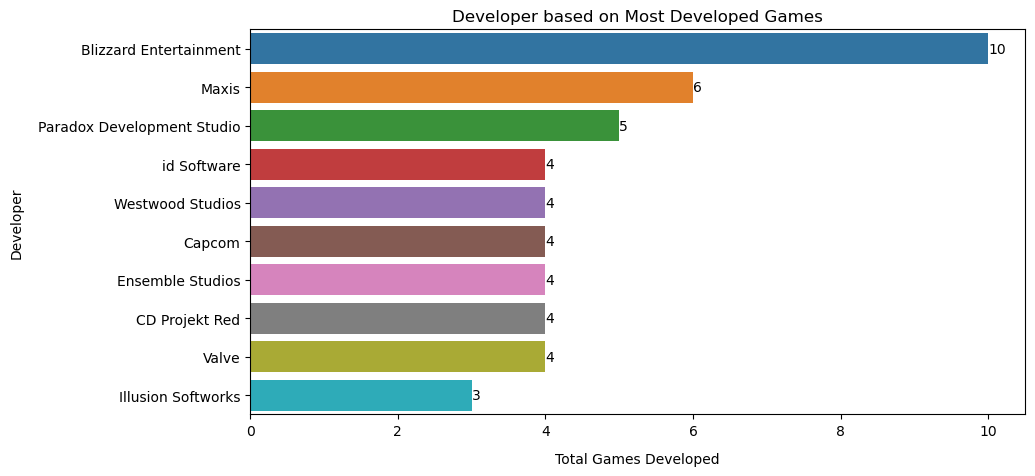

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(y=agg_developer.index, x=agg_developer.values)
plt.bar_label(plt.gca().containers[0])
plt.title('Developer based on Most Developed Games')
plt.xlabel('Total Games Developed', labelpad=10)
plt.ylabel('Developer', labelpad=10)
plt.show()

<b>Conclusion</b>: the developer with most developed games is Blizzard Entertainment.

#### 4. Which series is the most sales?

In [68]:
df_cleaned.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [69]:
agg_series = df_cleaned.groupby('Series', as_index=False).agg({'Sales':'sum'})
agg_series.sort_values(by='Sales', ascending=False, inplace=True)
agg_series

,Series,Sales
47,Minecraft,33.0
22,Diablo,26.0
75,The Sims,24.0
36,Half-Life,21.0
68,StarCraft,21.0
...,...,...
60,RoboCop,1.0
46,Microsoft Flight Simulator,1.0
58,Railroad Tycoon,1.0
56,Psychonauts,1.0


In [80]:
agg_series2 = agg_series.head(20)
agg_series2

,Series,Sales
47,Minecraft,33.0
22,Diablo,26.0
75,The Sims,24.0
36,Half-Life,21.0
68,StarCraft,21.0
85,Warcraft,19.0
76,The Witcher,16.0
61,RollerCoaster Tycoon,14.0
12,Civilization,14.0
35,Guild Wars,11.0


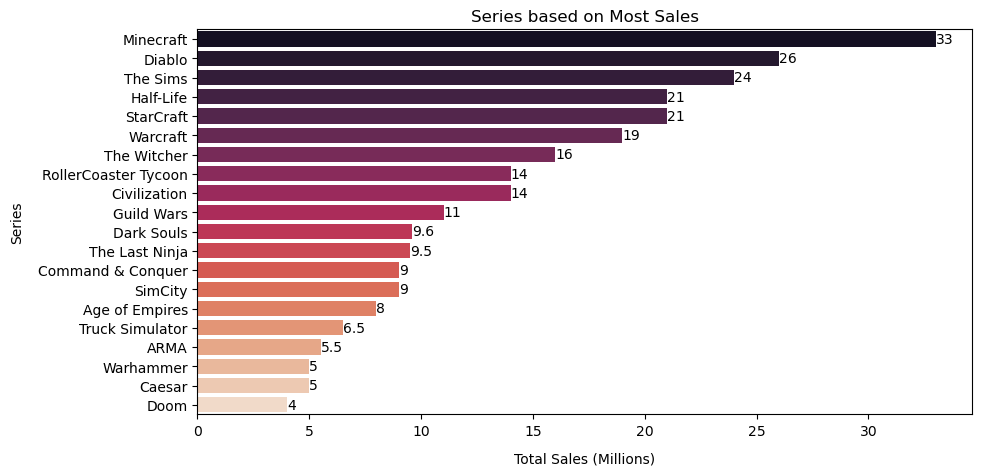

In [81]:
plt.figure(figsize=(10,5))
sns.barplot(y=agg_series2['Series'], x=agg_series2['Sales'], palette='rocket', orient='h')
plt.bar_label(plt.gca().containers[0])
plt.title('Series based on Most Sales')
plt.xlabel('Total Sales (Millions)', labelpad=10)
plt.ylabel('Series', labelpad=10)
plt.show()

<b>Conclusion</b>: the most sales of a series is Minecraft with 33 millions sales.

#### 5. Which series have the most games?

In [82]:
df_cleaned.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [83]:
agg_seriesgames = df_cleaned.groupby('Series', as_index=False).agg({'Name':'count'})
agg_seriesgames.sort_values(by='Name', ascending=False, inplace=True)
agg_seriesgames

,Series,Name
68,StarCraft,6
13,Command & Conquer,5
2,Age of Empires,4
12,Civilization,4
20,Dark Souls,3
...,...,...
41,International Karate,1
40,Hydlide,1
38,Hearts of Iron,1
37,Harry Potter,1


In [84]:
agg_seriesgames2 = agg_seriesgames.head(10)
agg_seriesgames2

,Series,Name
68,StarCraft,6
13,Command & Conquer,5
2,Age of Empires,4
12,Civilization,4
20,Dark Souls,3
65,SimCity,3
59,Resident Evil,3
85,Warcraft,3
76,The Witcher,3
75,The Sims,3


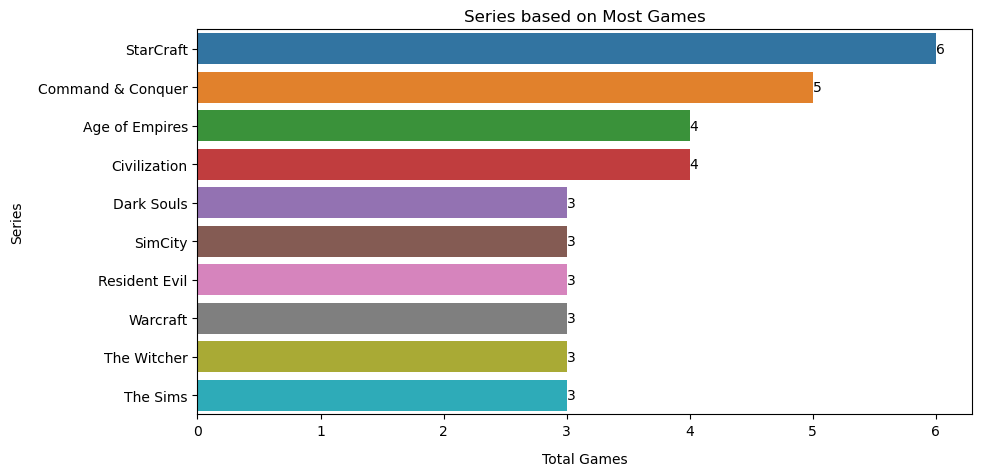

In [86]:
plt.figure(figsize=(10,5))
sns.barplot(y=agg_seriesgames2['Series'], x=agg_seriesgames2['Name'])
plt.bar_label(plt.gca().containers[0])
plt.title('Series based on Most Games')
plt.xlabel('Total Games', labelpad=10)
plt.ylabel('Series', labelpad=10)
plt.show()

<b>Conclusion</b>: the series with most games is StarCraft.